### Load the Data

In [67]:
import pandas as pd

df = pd.read_excel("data/MSFT_Linkedin_Processed.xlsx", parse_dates=["Date"], index_col=0)

In [68]:
target = df.change_tomorrow_direction

In [69]:
explanatory = df.drop(columns=["change_tomorrow", "change_tomorrow_direction"])

### Computing the model

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model_dt = DecisionTreeClassifier(max_depth=15)

In [72]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=15)

### Visualize the model

[Text(0.5304935296000788, 0.96875, 'Close <= 233.525\ngini = 0.498\nsamples = 1723\nvalue = [801, 922]'),
 Text(0.34686207151300236, 0.90625, 'Volume <= 46663750.0\ngini = 0.492\nsamples = 1074\nvalue = [467, 607]'),
 Text(0.22012288219070134, 0.84375, 'Volume <= 32050200.0\ngini = 0.488\nsamples = 965\nvalue = [407, 558]'),
 Text(0.09856432230102442, 0.78125, 'Volume <= 31751600.0\ngini = 0.495\nsamples = 759\nvalue = [342, 417]'),
 Text(0.0954122340425532, 0.71875, 'High <= 65.195\ngini = 0.494\nsamples = 753\nvalue = [336, 417]'),
 Text(0.031914893617021274, 0.65625, 'Close <= 64.45\ngini = 0.485\nsamples = 58\nvalue = [34, 24]'),
 Text(0.022852639873916468, 0.59375, 'Open <= 63.895\ngini = 0.498\nsamples = 43\nvalue = [20, 23]'),
 Text(0.014184397163120567, 0.53125, 'Open <= 62.27\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.01103230890464933, 0.46875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.017336485421591805, 0.46875, 'Volume <= 19007650.0\ngini = 0.436\ns

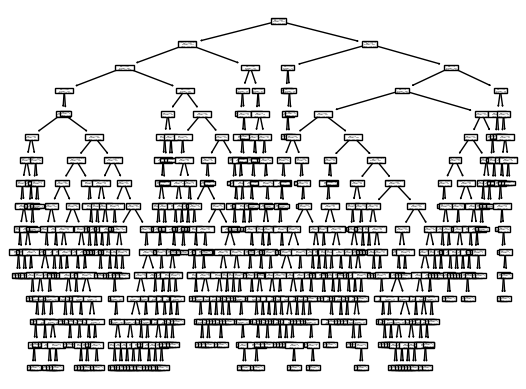

In [73]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

### Calculate the predictions

In [74]:
y_pred = model_dt.predict(X=explanatory)

In [75]:
df_predictions = df[["change_tomorrow_direction"]].copy()
df_predictions["prediction"] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2023-10-09,DOWN,DOWN
2023-10-10,UP,UP
2023-10-11,DOWN,DOWN


### Evaluate the model : Compare the model with the reality

In [76]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

##### Accuracy of model

In [77]:
comp.sum() / len(comp)

0.8630295995356936

In [78]:
model_dt.score(X=explanatory, y=target)

0.8630295995356936

### Save the model into a file

In [79]:
import os

In [80]:
os.makedirs("models")

FileExistsError: [Errno 17] File exists: 'models'

In [ ]:
model_dt

DecisionTreeClassifier(max_depth=15)

In [ ]:
import pickle

In [ ]:
with open("models/model_dt_classification.pkl", 'wb') as f:
    pickle.dump(model_dt, f)